In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from pandas import Series
from numpy import log
import plotly.offline as py

In [2]:
# TSA Mantra
# 1. Data should be numeric, not in category
# 2. Data type is correct and should be datetime column
# 3. There should not be any missing data, if yes, first impute and then try to solve
# 4. Data should be in sequential order (Timeseries always in ascending order)
# 5. Weather data has trend, seasonality, Error or abrupt changes or something x changes


In [3]:
df = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/TSForecasting/TCS.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,05/03/19,2005.000000,2007.000000,1976.599976,1988.099976,1779.321899,2449622
1,06/03/19,1989.300049,2015.000000,1985.050049,1999.599976,1789.614136,2635047
2,07/03/19,2005.000000,2024.050049,2000.199951,2013.300049,1801.875977,2539884
3,08/03/19,2025.000000,2033.000000,2010.050049,2022.699951,1810.288452,2031071
4,11/03/19,2028.900024,2033.000000,2003.650024,2014.800049,1803.218384,3111689


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1235 non-null   datetime64[ns]
 1   Open       1235 non-null   float64       
 2   High       1235 non-null   float64       
 3   Low        1235 non-null   float64       
 4   Close      1235 non-null   float64       
 5   Adj Close  1235 non-null   float64       
 6   Volume     1235 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.7 KB


In [7]:
#Check for auto-correlation

import statsmodels.api as sm
sm.stats.durbin_watson(df['Volume'])

#0.2528871438997474 is positive autocorrelation

0.2528871438997474

In [8]:
print(sm.stats.durbin_watson(df['Open']))
print(sm.stats.durbin_watson(df['Close']))


0.00020847298932672522
0.00020450938267665904


In [9]:
# There are some holiday and weekend data missing
# Series has to read as a daily series with Mon-Friday as weekdays, hence frequency is defined as bisiness day.
# Else if you define freq as 365 days, it would assume that stock exchange was working for all 365 days

from pandas.tseries.offsets import BDay #BDay is Business day (Mon-Fri)
df.shape

(1235, 7)

In [10]:
df_date = df[['Date', 'Volume']]
df_date.head()

,Date,Volume
0,2019-05-03,2449622
1,2019-06-03,2635047
2,2019-07-03,2539884
3,2019-08-03,2031071
4,2019-11-03,3111689


In [11]:
date1 = pd.date_range(start='3/5/2019', end='1/3/2024', freq=BDay())
date1

DatetimeIndex(['2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
               '2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14',
               '2019-03-15', '2019-03-18',
               ...
               '2023-12-21', '2023-12-22', '2023-12-25', '2023-12-26',
               '2023-12-27', '2023-12-28', '2023-12-29', '2024-01-01',
               '2024-01-02', '2024-01-03'],
              dtype='datetime64[ns]', length=1262, freq='B')

In [12]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
us_bd

<CustomBusinessDay>

In [13]:
date1 = pd.date_range(start='3/5/2019', end='1/3/2024', freq=us_bd)
date1

DatetimeIndex(['2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
               '2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14',
               '2019-03-15', '2019-03-18',
               ...
               '2023-12-19', '2023-12-20', '2023-12-21', '2023-12-22',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2024-01-02', '2024-01-03'],
              dtype='datetime64[ns]', length=1211, freq='C')

In [14]:
df_final = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/TSForecasting/TCS.NS.csv',
                        parse_dates=True, squeeze=True, index_col=0)

#Sqeeze will return index col as series


In [15]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-03,2005.000000,2007.000000,1976.599976,1988.099976,1779.321899,2449622
2019-06-03,1989.300049,2015.000000,1985.050049,1999.599976,1789.614136,2635047
2019-07-03,2005.000000,2024.050049,2000.199951,2013.300049,1801.875977,2539884
2019-08-03,2025.000000,2033.000000,2010.050049,2022.699951,1810.288452,2031071
2019-11-03,2028.900024,2033.000000,2003.650024,2014.800049,1803.218384,3111689


In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-05-03 to 2024-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


<Figure size 1500x800 with 0 Axes>

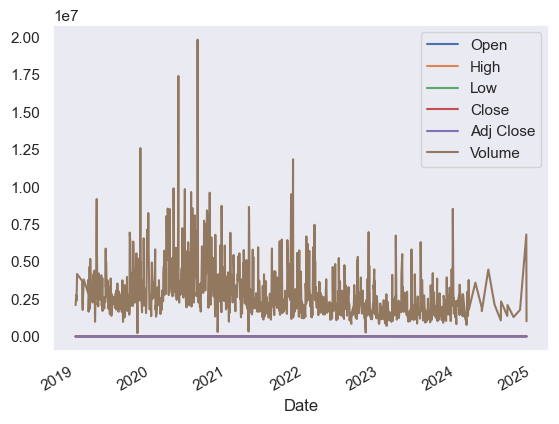

In [17]:
#Taking the data which we only want to predict

plt.figure(figsize=(15,8))
df_final.plot()
plt.grid()

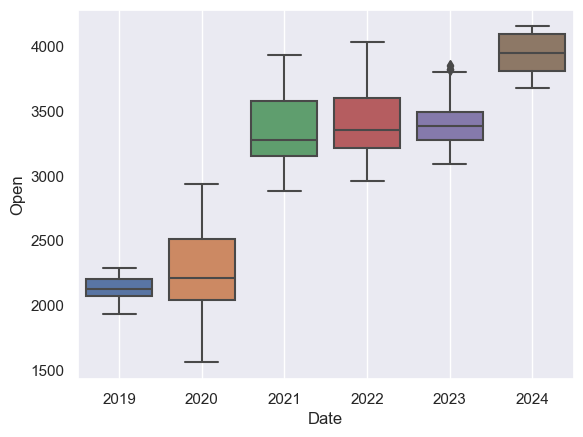

In [18]:
# Box plot of open balance WRT different years
sns.boxplot( x=df_final.index.year, y= df_final['Open'])
plt.grid()


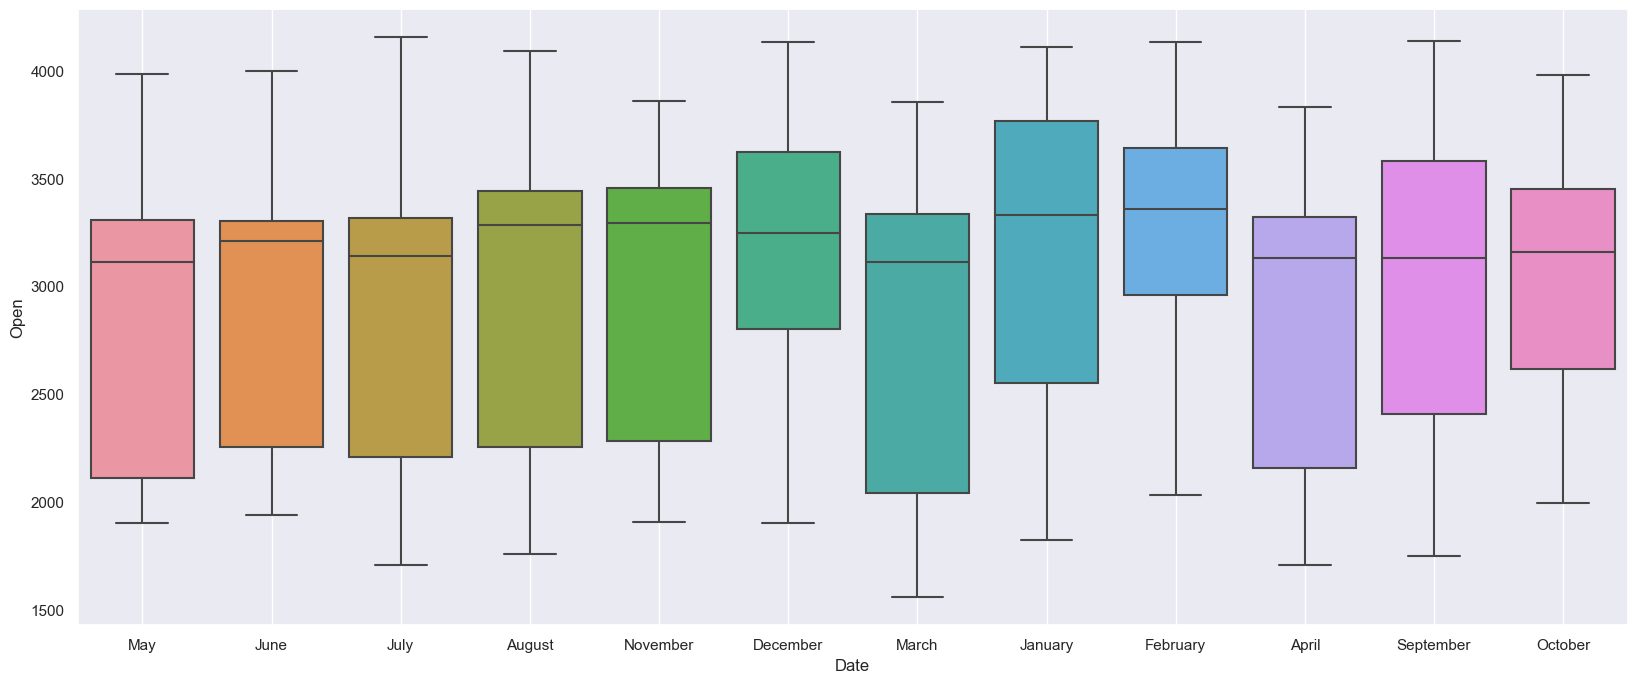

In [19]:
# Box plot of open balance WRT different months 

plt.figure(figsize=(20,8))
sns.boxplot( x=df_final.index.month_name(), y= df_final['Open'])
plt.grid()

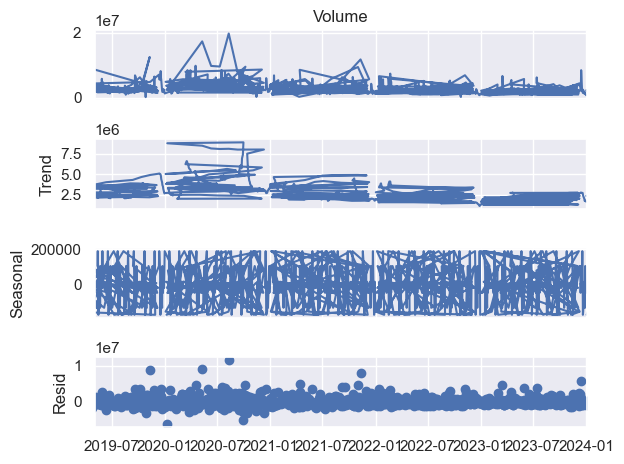

In [20]:
#Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_final['Volume'], period=12)
decomposition.plot()
plt.show()

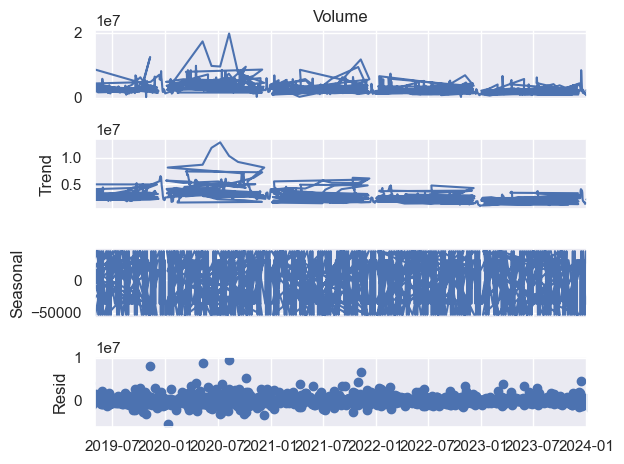

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_final['Volume'], period=5)
decomposition.plot()
plt.show()

In [22]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print("Trend", '\n', trend)

print("seasonality", '\n', seasonality)

print("residual", '\n', residual)


Trend 
 Date
2019-05-03          NaN
2019-06-03          NaN
2019-07-03    2553462.6
2019-08-03    2595248.2
2019-11-03    2434871.4
                ...    
2024-02-26    2359821.6
2024-02-27    2517955.0
2024-02-28    2418993.6
2024-02-29          NaN
2024-01-03          NaN
Name: trend, Length: 1235, dtype: float64
seasonality 
 Date
2019-05-03   -53171.081613
2019-06-03    14249.253346
2019-07-03    44462.414256
2019-08-03   -36219.858849
2019-11-03    30679.272859
                  ...     
2024-02-26   -53171.081613
2024-02-27    14249.253346
2024-02-28    44462.414256
2024-02-29   -36219.858849
2024-01-03    30679.272859
Name: seasonal, Length: 1235, dtype: float64
residual 
 Date
2019-05-03              NaN
2019-06-03              NaN
2019-07-03    -58041.014256
2019-08-03   -527957.341151
2019-11-03    646138.327141
                  ...      
2024-02-26   -927366.518387
2024-02-27    428270.746654
2024-02-28   -524231.014256
2024-02-29              NaN
2024-01-03              

In [23]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-03,2005.000000,2007.000000,1976.599976,1988.099976,1779.321899,2449622
2019-06-03,1989.300049,2015.000000,1985.050049,1999.599976,1789.614136,2635047
2019-07-03,2005.000000,2024.050049,2000.199951,2013.300049,1801.875977,2539884
2019-08-03,2025.000000,2033.000000,2010.050049,2022.699951,1810.288452,2031071
2019-11-03,2028.900024,2033.000000,2003.650024,2014.800049,1803.218384,3111689


In [24]:
df_final['Year'] = df_final.index.year
df_final['Month'] = df_final.index.month
df_final['Days'] = df_final.index.day
df_final.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Days
Date,,,,,,,,,
2019-05-03,2005.000000,2007.000000,1976.599976,1988.099976,1779.321899,2449622,2019,5,3
2019-06-03,1989.300049,2015.000000,1985.050049,1999.599976,1789.614136,2635047,2019,6,3
2019-07-03,2005.000000,2024.050049,2000.199951,2013.300049,1801.875977,2539884,2019,7,3
2019-08-03,2025.000000,2033.000000,2010.050049,2022.699951,1810.288452,2031071,2019,8,3
2019-11-03,2028.900024,2033.000000,2003.650024,2014.800049,1803.218384,3111689,2019,11,3


In [25]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-03,2005.000000,2007.000000,1976.599976,1988.099976,1779.321899,2449622
1,2019-06-03,1989.300049,2015.000000,1985.050049,1999.599976,1789.614136,2635047
2,2019-07-03,2005.000000,2024.050049,2000.199951,2013.300049,1801.875977,2539884
3,2019-08-03,2025.000000,2033.000000,2010.050049,2022.699951,1810.288452,2031071
4,2019-11-03,2028.900024,2033.000000,2003.650024,2014.800049,1803.218384,3111689


In [26]:
df = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/TSForecasting/TCS.NS.csv')

In [27]:
df['Time_stamp'] = pd.to_datetime(df['Date'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1235 non-null   object        
 1   Open        1235 non-null   float64       
 2   High        1235 non-null   float64       
 3   Low         1235 non-null   float64       
 4   Close       1235 non-null   float64       
 5   Adj Close   1235 non-null   float64       
 6   Volume      1235 non-null   int64         
 7   Time_stamp  1235 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 77.3+ KB


In [29]:
df_final_model = df.set_index('Time_stamp')
df_final_model.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_stamp,,,,,,,
2019-05-03,05/03/19,2005.000000,2007.000000,1976.599976,1988.099976,1779.321899,2449622
2019-06-03,06/03/19,1989.300049,2015.000000,1985.050049,1999.599976,1789.614136,2635047
2019-07-03,07/03/19,2005.000000,2024.050049,2000.199951,2013.300049,1801.875977,2539884
2019-08-03,08/03/19,2025.000000,2033.000000,2010.050049,2022.699951,1810.288452,2031071
2019-11-03,11/03/19,2028.900024,2033.000000,2003.650024,2014.800049,1803.218384,3111689


In [30]:
df_final_model['Year'] = df_final_model.index.year
df_final_model['Month'] = df_final_model.index.month
df_final_model.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
Time_stamp,,,,,,,,,
2019-05-03,05/03/19,2005.000000,2007.000000,1976.599976,1988.099976,1779.321899,2449622,2019,5
2019-06-03,06/03/19,1989.300049,2015.000000,1985.050049,1999.599976,1789.614136,2635047,2019,6
2019-07-03,07/03/19,2005.000000,2024.050049,2000.199951,2013.300049,1801.875977,2539884,2019,7
2019-08-03,08/03/19,2025.000000,2033.000000,2010.050049,2022.699951,1810.288452,2031071,2019,8
2019-11-03,11/03/19,2028.900024,2033.000000,2003.650024,2014.800049,1803.218384,3111689,2019,11


In [31]:
df_final_model.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
Time_stamp,,,,,,,,,
2024-02-29,29/02/24,4099.000000,4138.100098,4064.550049,4095.100098,4095.100098,3772719,2024,2
2024-01-03,01/03/24,4107.200195,4140.000000,4086.800049,4094.350098,4094.350098,2043265,2024,1


In [32]:
df_final_model.shape

(1235, 9)

In [33]:
train = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2023-6-01')]  
train.shape

(1047, 9)

In [34]:
test = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2023-6-01')]  
test.shape

(188, 9)

In [35]:
train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
Time_stamp,,,,,,,,,
2023-02-11,02/11/23,3343.199951,3375.949951,3343.199951,3360.100098,3344.602295,1245384,2023,2
2023-03-11,03/11/23,3382.000000,3387.899902,3344.300049,3350.899902,3335.444336,1402598,2023,3
2023-01-12,01/12/23,3500.000000,3516.949951,3490.050049,3511.649902,3495.453125,1172141,2023,1
2023-04-12,04/12/23,3544.649902,3547.800049,3498.000000,3512.449951,3496.249268,1625213,2023,4
2023-05-12,05/12/23,3538.000000,3538.000000,3502.800049,3531.600098,3515.311279,1377656,2023,5


In [36]:
test.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
Time_stamp,,,,,,,,,
2024-02-26,26/02/24,4036.000000,4050.000000,3982.750000,4001.050049,4001.050049,1379284,2024,2
2024-02-27,27/02/24,3999.000000,4124.000000,3999.000000,4104.399902,4104.399902,2960475,2024,2
2024-02-28,28/02/24,4095.600098,4154.899902,4089.000000,4118.950195,4118.950195,1939225,2024,2
2024-02-29,29/02/24,4099.000000,4138.100098,4064.550049,4095.100098,4095.100098,3772719,2024,2
2024-01-03,01/03/24,4107.200195,4140.000000,4086.800049,4094.350098,4094.350098,2043265,2024,1


In [37]:
train_final = train[['Volume']]
test_final = test[['Volume']]

In [38]:
train_final.head(2)

,Volume
Time_stamp,
2019-05-03,2449622
2019-06-03,2635047


In [39]:
test_final.head(2)

,Volume
Time_stamp,
2023-06-01,2488376
2023-09-01,2885060


In [40]:
from statsmodels.tsa.stattools import adfuller

In [58]:
# Check for stationarity of series at alpha <= 0.05 using statistical test (adfuller, rolling stats)

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    # plot rolling stats
    orig = plt.plot(timeseries, color='blue', label = 'Original')
    mean = plt.plot(rolmean, col='red', label='rolling mean')
    std = plt.plot(rolstd, col='black', label='rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation - Stationary or not')
    plt.show(block=False)

    #Perform dickey Fuller test
    print('Dickey Fuller test result :')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index= ['ADF Test stats', 'P value', '#Lags', 'No. of Observations' ])
    for key, value in dftest[4].items():
        dfoutput['Critical values (%s)'%key] = value
    print(dfoutput, '\n')


AttributeError: Line2D.set() got an unexpected keyword argument 'col'

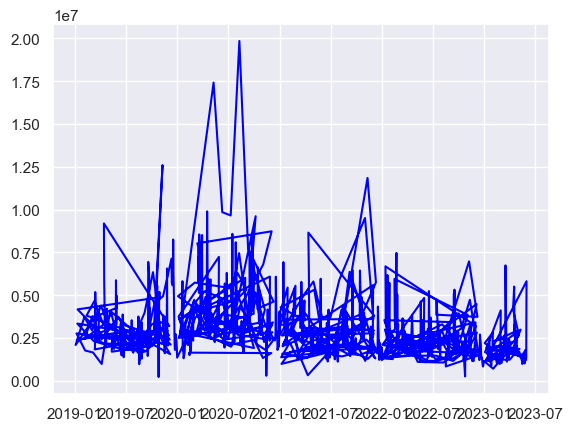

In [59]:
test_stationarity(train_final['Volume'])

In [42]:
def stationarity(timeseries):
    result = adfuller(timeseries)
    print('Augumented Dickly Fuller test - Check for Stationary data')
    labels = ['ADF Test stats', 'P value', '#Lags', 'No. of Observations' ]

    for i, j in zip(result, labels):
        print(j, str(i))

    if result[1] < 0.05: # Checking P value
        print('Strong evidance against Null hypothesis and my timeseries is stationary')
    else:
        print('Weak evidance against Null hypothesis and my timeseries is non - stationary')

In [43]:
stationarity(train_final['Volume'])

Augumented Dickly Fuller test - Check for Stationary data
ADF Test stats -5.928368275368913
P value 2.413316862707953e-07
#Lags 7
No. of Observations 1039
Strong evidance against Null hypothesis and my timeseries is stationary


In [44]:
# Time series is stationary at 5% alpha value as per dickey fuller test

In [45]:
import itertools
p=q=range(0,3)
d = range(0,1) #Default considering 1, as p value is less than 0.05 already in first instance

pdq = list(itertools.product(p,d,q)) #Trend

model_pdq = [(x[0], x[1], x[2], 5)for x in list(itertools.product(p,d,q))] # Seasonality
print('Example of parameters combination for model')
print('Model : {} {} '.format(pdq[1], model_pdq[1]))
print('Model : {} {} '.format(pdq[1], model_pdq[2]))
print('Model : {} {} '.format(pdq[1], model_pdq[0]))
print('Model : {} {} '.format(pdq[0], model_pdq[1]))
print('Model : {} {} '.format(pdq[2], model_pdq[1]))


Example of parameters combination for model
Model : (0, 0, 1) (0, 0, 1, 5) 
Model : (0, 0, 1) (0, 0, 2, 5) 
Model : (0, 0, 1) (0, 0, 0, 5) 
Model : (0, 0, 0) (0, 0, 1, 5) 
Model : (0, 0, 2) (0, 0, 1, 5) 


## Building ARIMA model


In [46]:
#Creating empty df with col names

dfobj = pd.DataFrame(columns=['params','AIC'])

In [47]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    model = ARIMA(train_final['Volume'], order=param)
    #ARIMA = Only trend no seasonality. For seasonality SARIMA
    results_ARIMA = model.fit()
    print('ARIMA{} - AIC: {}'.format(param, results_ARIMA.aic))
    dfobj = dfobj.append({'param':param, 'AIC': results_ARIMA.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC: 39287.11883286052
ARIMA(0, 0, 1) - AIC: 32831.43632053809
ARIMA(0, 0, 2) - AIC: 32791.77484139544
ARIMA(1, 0, 0) - AIC: 32722.177051230276
ARIMA(1, 0, 1) - AIC: 32635.872094610968


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

ARIMA(1, 0, 2) - AIC: 32624.785684753304
ARIMA(2, 0, 0) - AIC: 32684.642561364373
ARIMA(2, 0, 1) - AIC: 32625.38266735857


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

ARIMA(2, 0, 2) - AIC: 32625.335352054637


In [48]:
dfobj.sort_values(by=['AIC'])

,params,AIC,param
5,NaN,32624.785685,"(1, 0, 2)"
8,NaN,32625.335352,"(2, 0, 2)"
7,NaN,32625.382667,"(2, 0, 1)"
4,NaN,32635.872095,"(1, 0, 1)"
6,NaN,32684.642561,"(2, 0, 0)"
3,NaN,32722.177051,"(1, 0, 0)"
2,NaN,32791.774841,"(0, 0, 2)"
1,NaN,32831.436321,"(0, 0, 1)"
0,NaN,39287.118833,"(0, 0, 0)"


In [49]:
# ARIMA (1, 0, 2) has the lowest AIC value 32624.785685

In [50]:
model = ARIMA(train_final['Volume'], order=(1,0,2),
               enforce_stationarity=False, enforce_invertibility=False)
result_ARIMA = model.fit()

print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 1047
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -16306.668
Date:                Sun, 03 Mar 2024   AIC                          32625.335
Time:                        09:43:08   BIC                          32655.057
Sample:                             0   HQIC                         32636.607
                               - 1047                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.915e+06   1.67e-08   1.75e+14      0.000    2.92e+06    2.92e+06
ar.L1          0.6232      0.138      4.528      0.000       0.353       0.893
ar.L2          0.2980      0.119      2.511      0.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

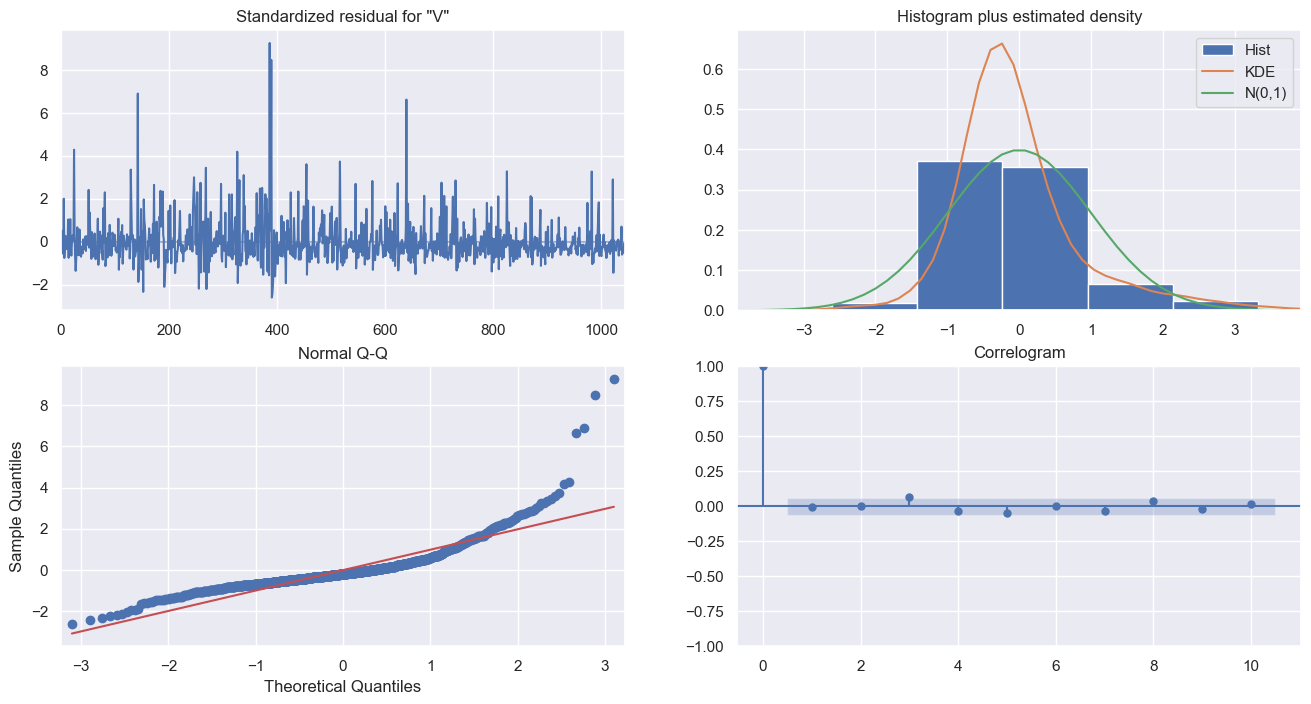

In [51]:
result_ARIMA.plot_diagnostics(figsize=(16,8))
plt.show()

In [52]:
final_hat_avg = test_final.copy()
pred_ARIMA = results_ARIMA.forecast(steps=len(test_final))
pred_ARIMA

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



1047    1.755896e+06
1048    1.900200e+06
1049    1.937243e+06
1050    2.003325e+06
1051    2.055544e+06
            ...     
1230    2.915260e+06
1231    2.915261e+06
1232    2.915262e+06
1233    2.915263e+06
1234    2.915263e+06
Name: predicted_mean, Length: 188, dtype: float64

In [53]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(test_final.Volume, pred_ARIMA, squared=False))
print(rmse)

1153.3379516020573


In [54]:
import numpy as np
def calculate_mape(actuals, predicted):
    actuals, predicted = np.array(actuals), np.array(predicted)
    return np.mean(np.abs((actuals - predicted)/ actuals)) *100

In [55]:
mape = calculate_mape(test_final.Volume, pred_ARIMA)
print('MAPE :', mape)

# MAPE  74% is not a good value

MAPE : 74.09435531368503


In [56]:
resultDF = pd.DataFrame({'Test RMSE' : rmse}, index=['ARIMA(1,0,2)'])
resultDF

,Test RMSE
"ARIMA(1,0,2)",1153.337952


ValueError: x and y must have same first dimension, but have shapes (1047,) and (188,)

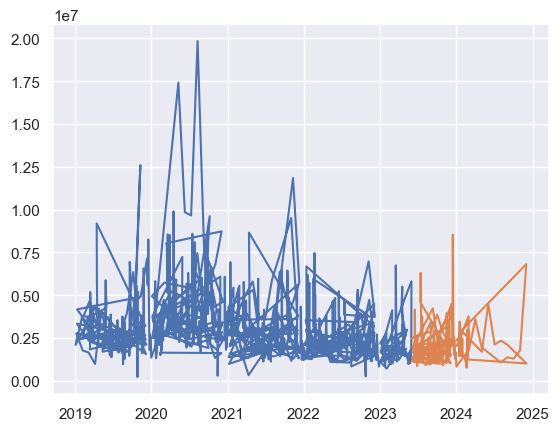

In [57]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')

plt.plot(train_final.index, pred_ARIMA ,label='Predicted Data - ARIMA model')
plt.legend(loc='best')
plt.grid()


# SARIMA model

In [ ]:
dfobj2 = pd.DataFrame(columns=['Param', 'seasonal', 'AIC'])
dfobj2

In [ ]:
import statsmodels.api as sm
dfobj2 = pd.DataFrame(columns=['Param', 'seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        mpdel = sm.tsa.statespace.SARIMAX(train_final['Volume'], order=param, seasonal_order=param_seasonal, 
                                          enforce_invertibility=False, enforce_stationarity=False)
        results_SARIMA = model.fit()

        print('SARIMA{} x {}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfobj2 = dfobj2.append({'Param':param, 'seasonal':param_seasonal, 'AIC':results_SARIMA.aic}, ignore_index=True)
        


In [ ]:
dfobj2.sort_values(by=['AIC'])

# Day 2

In [62]:
model = sm.tsa.statespace.SARIMAX(train_final['Volume'], order=(2,0,2), seasonal_order=(2,0,2,5), 
                                              enforce_invertibility=False, enforce_stationarity=False)
results = model.fit()
print(results.summary())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54678D+01    |proj g|=  4.44890D-01

At iterate    5    f=  1.54011D+01    |proj g|=  2.22158D-01

At iterate   10    f=  1.53946D+01    |proj g|=  1.98188D-02

At iterate   15    f=  1.53932D+01    |proj g|=  2.17811D-02

At iterate   20    f=  1.53914D+01    |proj g|=  2.70766D-02

At iterate   25    f=  1.53906D+01    |proj g|=  6.14938D-03

At iterate   30    f=  1.53894D+01    |proj g|=  3.74932D-02

At iterate   35    f=  1.53893D+01    |proj g|=  4.85724D-03

At iterate   40    f=  1.53893D+01    |proj g|=  6.13975D-03

At iterate   45    f=  1.53893D+01    |proj g|=  1.95900D-02

At iterate   50    f=  1.53890D+01    |proj g|=  3.27650D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



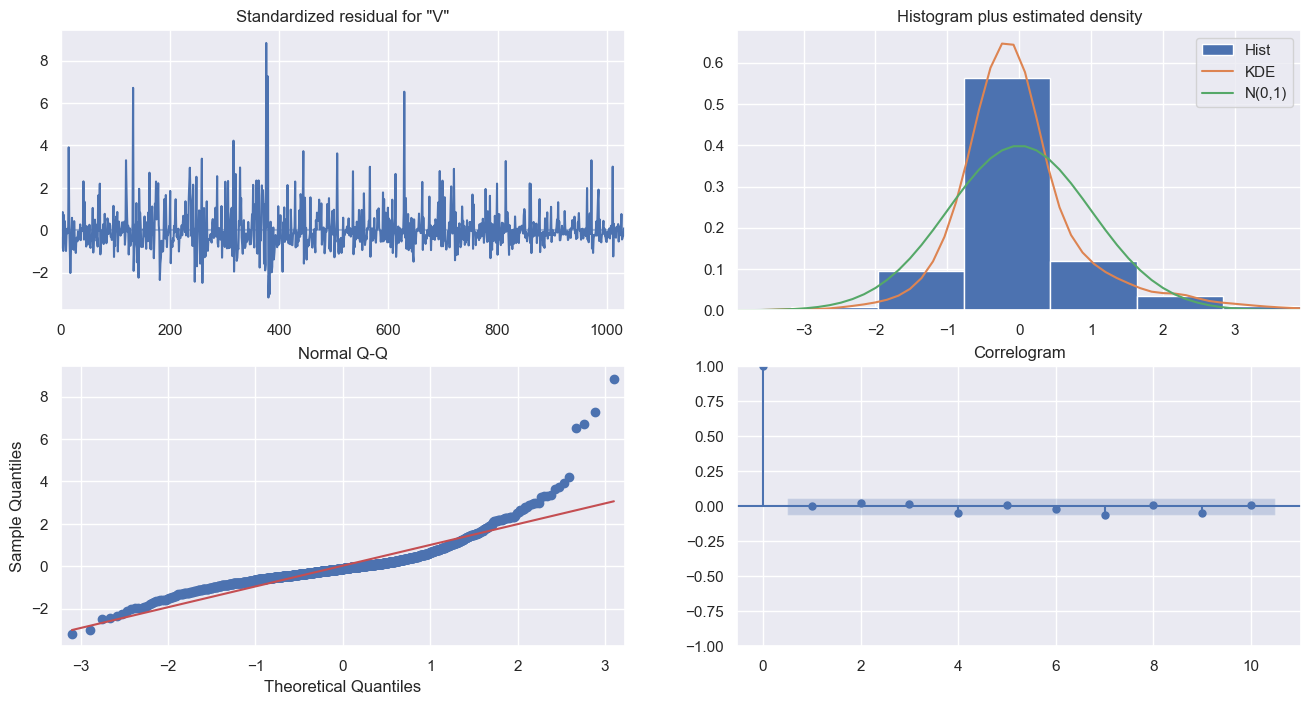

In [63]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [67]:
final_hat_avg = test_final.copy()
predict_SARIMA = results.get_forecast(steps=len(test_final))
predict_SARIMA.predicted_mean

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



1047    1.534381e+06
1048    1.579080e+06
1049    1.432367e+06
1050    1.539606e+06
1051    1.539778e+06
            ...     
1230    7.699753e+05
1231    7.670291e+05
1232    7.640870e+05
1233    7.611494e+05
1234    7.582012e+05
Name: predicted_mean, Length: 188, dtype: float64

In [66]:
rmse = sqrt(mean_squared_error(test_final.Volume, predict_SARIMA.predicted_mean, squared=False))
print(rmse)

1192.6797773988699


In [71]:
mape2 = calculate_mape(test_final.Volume, predict_SARIMA.predicted_mean)
print('MAPE :', mape)

MAPE : 38.89676634718412


In [74]:
resultDF = pd.DataFrame({'Test MAPE' : mape}, index=['ARIMA(1,0,2)'])
resultDF

resultDF2 = pd.DataFrame({'Test MAPE':mape2}, index=['SARIMA(2,0,2)(2,0,2,5)'])
resultDF_final = pd.concat([resultDF, resultDF2]) 
resultDF_final

#Check again, variables are wrong

,Test MAPE
"ARIMA(1,0,2)",38.896766
"SARIMA(2,0,2)(2,0,2,5)",38.896766


## Building SARIMAX model - include external factor (Multivariate analysis)

In [75]:
df_final.head(2)

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Days
Date,,,,,,,,,
2019-05-03,2005.000000,2007.0,1976.599976,1988.099976,1779.321899,2449622,2019,5,3
2019-06-03,1989.300049,2015.0,1985.050049,1999.599976,1789.614136,2635047,2019,6,3


In [99]:
# Let's create exogenious variable
# Considering Opening, High, Low, Close, Adj close 

ex_train = train[['Open','High','Low','Adj Close']]
ex_test = test[['Open','High','Low','Adj Close']]


In [100]:
ex_train.head(2)

,Open,High,Low,Adj Close
Time_stamp,,,,
2019-05-03,2005.000000,2007.0,1976.599976,1779.321899
2019-06-03,1989.300049,2015.0,1985.050049,1789.614136


In [101]:
dfobj3 = pd.DataFrame(columns=['Param','seasonal','AIC'])
dfobj3

,Param,seasonal,AIC


In [108]:
# Let's first use DARIMAX with exogenous variable (external factor)

for param in pdq:
    for param_seasonal in model_pdq:
        model = sm.tsa.statespace.SARIMAX(train_final['Volume'], exog=ex_train,
                                           order=param, seasonal_order=param_seasonal, 
                                          enforce_invertibility=False, enforce_stationarity=False)
        #Exog is external factor, multivariate analysis

        results_SARIMAX = model.fit()
        print('SARIMAX{}{} - AIC{}'.format(param, param_seasonal, results_SARIMAX.aic))
        dfobj3 = dfobj3.append({'Param':param, 'seasonal': param_seasonal, 'AIC': results_SARIMAX.aic}, ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85559D+01    |proj g|=  2.16744D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   2.167D-08   1.856D+01
  F =   18.555948759790194     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(0, 0, 0)(0, 0, 0, 5) - AIC38866.15670300067
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables a

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.54419D+01    |proj g|=  8.66017D-02

At iterate   10    f=  1.54385D+01    |proj g|=  9.44520D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     12     17      1     0     0   1.503D-05   1.544D+01
  F =   15.438528834044719     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 0, 0)(1, 0, 1, 5) - AIC32342.279378489642
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53872D+01    |proj g|=  3.23584D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.53679D+01    |proj g|=  3.95141D-02

At iterate   10    f=  1.53625D+01    |proj g|=  8.74066D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     13     23      1     0     0   7.186D-06   1.536D+01
  F =   15.362504815143707     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(0, 0, 0)(1, 0, 2, 5) - AIC32185.085082910922
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53950D+01    |proj g|=  5.54135D-06

           * * *

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 

SARIMAX(0, 0, 0)(2, 0, 0, 5) - AIC32251.20408109683
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53957D+01    |proj g|=  2.32954D-01

At iterate    5    f=  1.53851D+01    |proj g|=  4.70292D-02

At iterate   10    f=  1.53767D+01    |proj g|=  3.81144D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     12     25      1     0     0   1.658D-05   1.538D+01
  F =   15.376710812350746     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 0, 0)(2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.53643D+01    |proj g|=  3.83834D-02

At iterate   10    f=  1.53630D+01    |proj g|=  1.11832D-03

At iterate   15    f=  1.53627D+01    |proj g|=  1.07411D-02

At iterate   20    f=  1.53624D+01    |proj g|=  3.92141D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     21     25      1     0     0   9.490D-04   1.536D+01
  F =   15.362449882340378     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 0, 0)(2, 0, 2, 5) - AIC32186.970053620753
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     10      1     0     0   8.323D-06   1.549D+01
  F =   15.492948728491195     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(0, 0, 1)(0, 0, 0, 5) - AIC32454.234637460562
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54059D+01    |proj g|=  4.37607D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 

SARIMAX(0, 0, 1)(0, 0, 2, 5) - AIC32113.695455728735
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54342D+01    |proj g|=  8.14954D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4      6      1     0     0   2.298D-06   1.543D+01
  F =   15.430593886842187     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(0, 0, 1)(1, 0, 0, 5) - AIC32325.66359904754
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.53898D+01    |proj g|=  2.91345D-02

At iterate   10    f=  1.53861D+01    |proj g|=  5.88051D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     14     22      1     0     0   3.152D-06   1.539D+01
  F =   15.386077991434421     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(0, 0, 1)(1, 0, 1, 5) - AIC32234.447314063676
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53215D+01    |proj g|=  1.24488D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.53172D+01    |proj g|=  3.41895D-02

At iterate   10    f=  1.53123D+01    |proj g|=  3.13559D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     26      1     0     0   2.091D-04   1.531D+01
  F =   15.311744143456419     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 0, 1)(1, 0, 2, 5) - AIC32080.79223639774
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53568D+01    |proj g|=  7.02367D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.53534D+01    |proj g|=  3.90994D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5      7      1     0     0   3.910D-06   1.535D+01
  F =   15.353411051485502     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(0, 0, 1)(2, 0, 0, 5) - AIC32166.04274181064
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53485D+01    |proj g|=  7.05537D-02

At iterate    5    f=  1.53465D+01    |proj g|=  1.89497D-02


 This problem is unconstrained.



At iterate   10    f=  1.53411D+01    |proj g|=  7.70186D-02

At iterate   15    f=  1.53406D+01    |proj g|=  1.25214D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     16     23      1     0     0   1.978D-05   1.534D+01
  F =   15.340558221553644     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 0, 1)(2, 0, 1, 5) - AIC32141.128915933332
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53187D+01    |proj g|=  1.12488D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.53141D+01    |proj g|=  4.30926D-02

At iterate   10    f=  1.53118D+01    |proj g|=  1.81696D-03

At iterate   15    f=  1.53118D+01    |proj g|=  5.24536D-04

At iterate   20    f=  1.53118D+01    |proj g|=  3.61501D-03

At iterate   25    f=  1.53117D+01    |proj g|=  2.11712D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     25     30      1     0     0   2.117D-04   1.531D+01
  F =   15.311738878861705     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 0, 1)(2, 0, 2, 5) - AIC32082.78121233641
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     10      1     0     0   1.818D-06   1.546D+01
  F =   15.460466875833836     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(0, 0, 2)(0, 0, 0, 5) - AIC32388.21763799605
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53797D+01    |proj g|=  6.31119D-02

At iterate    5    f=  1.53777D+01    |proj g|=  2.62688D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of fu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53049D+01    |proj g|=  6.88881D-02

At iterate    5    f=  1.53025D+01    |proj g|=  4.86526D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5      8      1     0     0   4.865D-06   1.530D+01
  F =   15.302534769804247     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(0, 0, 2)(0, 0, 2, 5) - AIC32061.507807970094
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.53644D+01    |proj g|=  5.35656D-02

At iterate   10    f=  1.53627D+01    |proj g|=  1.45999D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     11     19      1     0     0   7.108D-06   1.536D+01
  F =   15.362713495247116     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(0, 0, 2)(1, 0, 1, 5) - AIC32187.52205904746
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52990D+01    |proj g|=  7.79357D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52930D+01    |proj g|=  4.30949D-02

At iterate   10    f=  1.52888D+01    |proj g|=  2.91044D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     14     32      1     0     0   6.175D-06   1.529D+01
  F =   15.288730781377893     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(0, 0, 2)(1, 0, 2, 5) - AIC32034.602256205308
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53555D+01    |proj g|=  1.24030D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 

SARIMAX(0, 0, 2)(2, 0, 0, 5) - AIC32147.226069419932
At iterate    5    f=  1.53435D+01    |proj g|=  2.27393D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5      7      1     0     0   2.274D-05   1.534D+01
  F =   15.343469947191945     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53419D+01    |proj g|=  8.48476D-02

At iterate    5    f=  1.53351D+01    |proj g|=  5.26265D-02


 This problem is unconstrained.



At iterate   10    f=  1.53321D+01    |proj g|=  4.84913D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     14     28      1     0     0   6.794D-06   1.533D+01
  F =   15.332021775355775     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(0, 0, 2)(2, 0, 1, 5) - AIC32125.253597594994
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52970D+01    |proj g|=  8.15448D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52902D+01    |proj g|=  3.89702D-02

At iterate   10    f=  1.52887D+01    |proj g|=  1.31124D-03

At iterate   15    f=  1.52887D+01    |proj g|=  4.19099D-04

At iterate   20    f=  1.52887D+01    |proj g|=  1.21063D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     24     30      1     0     0   1.218D-05   1.529D+01
  F =   15.288691038367872     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 0, 2)(2, 0, 2, 5) - AIC32036.519034342324
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4      6      1     0     0   2.522D-06   1.539D+01
  F =   15.391689935714391     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(1, 0, 0)(0, 0, 1, 5) - AIC32244.198725385933
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53197D+01    |proj g|=  6.59758D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.53831D+01    |proj g|=  3.58442D-02

At iterate   10    f=  1.53796D+01    |proj g|=  1.14076D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     13     24      1     0     0   7.598D-05   1.538D+01
  F =   15.379527364400705     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 0)(1, 0, 1, 5) - AIC32220.730301055075
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53151D+01    |proj g|=  8.33915D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.53106D+01    |proj g|=  4.19058D-02

At iterate   10    f=  1.53058D+01    |proj g|=  1.92161D-02

At iterate   15    f=  1.53057D+01    |proj g|=  1.40616D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     15     22      1     0     0   1.406D-05   1.531D+01
  F =   15.305702500512094     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 0)(1, 0, 2, 5) - AIC32068.141036072324
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.53163D+01    |proj g|=  8.55174D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5      7      1     0     0   8.552D-06   1.532D+01
  F =   15.316300416385245     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(1, 0, 0)(2, 0, 0, 5) - AIC32088.333071910703
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53161D+01    |proj g|=  9.62551D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.53086D+01    |proj g|=  4.41055D-02

At iterate   10    f=  1.53058D+01    |proj g|=  8.70764D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     27      1     0     0   4.528D-06   1.531D+01
  F =   15.305739749959702     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(1, 0, 0)(2, 0, 1, 5) - AIC32068.219036415616


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53138D+01    |proj g|=  9.13015D-02

At iterate    5    f=  1.53078D+01    |proj g|=  5.28032D-02

At iterate   10    f=  1.53057D+01    |proj g|=  1.14242D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     14     18      1     0     0   1.881D-05   1.531D+01
  F =   15.305605888244564     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 0)(2, 0, 2, 5) - AIC32069.93872998412


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54023D+01    |proj g|=  1.36240D-01

At iterate    5    f=  1.54000D+01    |proj g|=  1.63780D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     10      1     0     0   3.462D-06   1.540D+01
  F =   15.399972436582543     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(1, 0, 1)(0, 0, 0, 5) - AIC32261.542282203845
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52552D+01    |proj g|=  1.80668D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      9     12      1     0     0   1.757D-05   1.526D+01
  F =   15.255101981619328     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 1)(0, 0, 2, 5) - AIC31962.18354951087
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53997D+01    |proj g|=  3.29754D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.53424D+01    |proj g|=  1.33284D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      8     11      1     0     0   3.310D-06   1.534D+01
  F =   15.342338583474627     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(1, 0, 1)(1, 0, 0, 5) - AIC32142.856993795867
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53502D+01    |proj g|=  2.53227D-01

At iterate    5    f=  1.53274D+01    |proj g|=  6.11877D-03


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate   10    f=  1.53274D+01    |proj g|=  5.06996D-03

At iterate   15    f=  1.53274D+01    |proj g|=  1.30214D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     18     22      1     0     0   6.312D-06   1.533D+01
  F =   15.327373105453862     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(1, 0, 1)(1, 0, 1, 5) - AIC32113.519282820387
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52750D+01    |proj g|=  2.41655D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52557D+01    |proj g|=  2.05543D-02

At iterate   10    f=  1.52554D+01    |proj g|=  1.15580D-03

At iterate   15    f=  1.52553D+01    |proj g|=  1.46968D-02

At iterate   20    f=  1.52551D+01    |proj g|=  2.43172D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     24     28      1     0     0   3.683D-06   1.526D+01
  F =   15.255094791438728     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(1, 0, 1)(1, 0, 2, 5) - AIC31964.168493272697
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52695D+01    |proj g|=  1.91081D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      9     12      1     0     0   3.126D-05   1.527D+01
  F =   15.269370764088563     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 1)(2, 0, 0, 5) - AIC31992.06238000145
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52937D+01    |proj g|=  2.57436D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52701D+01    |proj g|=  2.52771D-02

At iterate   10    f=  1.52697D+01    |proj g|=  9.17194D-04

At iterate   15    f=  1.52696D+01    |proj g|=  7.74953D-03

At iterate   20    f=  1.52694D+01    |proj g|=  3.79582D-03

At iterate   25    f=  1.52694D+01    |proj g|=  5.80648D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     25     28      1     0     0   5.806D-05   1.527D+01
  F =   15.269365736718713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 1)(2, 0, 1, 5) - AIC31994.051852688986
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52560D+01    |proj g|=  1.34508D-02

At iterate   10    f=  1.52556D+01    |proj g|=  3.40237D-03

At iterate   15    f=  1.52554D+01    |proj g|=  2.38285D-02

At iterate   20    f=  1.52552D+01    |proj g|=  2.63134D-04

At iterate   25    f=  1.52552D+01    |proj g|=  2.99426D-03

At iterate   30    f=  1.52551D+01    |proj g|=  3.79220D-03

At iterate   35    f=  1.52551D+01    |proj g|=  5.51361D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     38     46      1     0     0   8.433D-04   1.526D+01
  F =   15.255094216511820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      9     11      1     0     0   3.462D-06   1.538D+01
  F =   15.384951889589217     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(1, 0, 2)(0, 0, 0, 5) - AIC32232.08925679982
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53241D+01    |proj g|=  1.39578D-01

At iterate    5    f=  1.53128D+01    |proj g|=  1.30491D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of fu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52399D+01    |proj g|=  1.93600D-02

At iterate   10    f=  1.52398D+01    |proj g|=  7.02450D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     10     13      1     0     0   7.024D-05   1.524D+01
  F =   15.239803001228626     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 2)(0, 0, 2, 5) - AIC31932.147484572743


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53891D+01    |proj g|=  2.99514D-01

At iterate    5    f=  1.53423D+01    |proj g|=  3.44025D-02

At iterate   10    f=  1.53417D+01    |proj g|=  4.21397D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     12     15      1     0     0   3.857D-05   1.534D+01
  F =   15.341727579938246     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 2)(1, 0, 0, 5) - AIC32143.577552390685
RUNNING THE L-BFG

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52404D+01    |proj g|=  3.79607D-02

At iterate   10    f=  1.52401D+01    |proj g|=  2.49338D-03

At iterate   15    f=  1.52401D+01    |proj g|=  9.55195D-03

At iterate   20    f=  1.52398D+01    |proj g|=  6.57059D-03

At iterate   25    f=  1.52398D+01    |proj g|=  6.19389D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     26     30      1     0     0   2.029D-05   1.524D+01
  F =   15.239802334862288     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 2)(1, 0, 2, 5) - AIC31934.146089201633


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53169D+01    |proj g|=  2.58578D-01

At iterate    5    f=  1.52699D+01    |proj g|=  4.66341D-02

At iterate   10    f=  1.52686D+01    |proj g|=  7.87193D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     11     14      1     0     0   2.001D-05   1.527D+01
  F =   15.268583237349954     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 2)(2, 0, 0, 5) - AIC31992.413299010805
RUNNING THE L-BFG

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52691D+01    |proj g|=  5.47033D-02

At iterate   10    f=  1.52688D+01    |proj g|=  9.49577D-04

At iterate   15    f=  1.52688D+01    |proj g|=  2.18746D-03

At iterate   20    f=  1.52686D+01    |proj g|=  3.89698D-03

At iterate   25    f=  1.52686D+01    |proj g|=  8.71371D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     26     31      1     0     0   1.849D-05   1.527D+01
  F =   15.268582611698630     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 2)(2, 0, 1, 5) - AIC31994.411988896933


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52540D+01    |proj g|=  1.83924D-01

At iterate    5    f=  1.52407D+01    |proj g|=  2.77307D-02

At iterate   10    f=  1.52402D+01    |proj g|=  3.70787D-03

At iterate   15    f=  1.52399D+01    |proj g|=  1.65664D-02

At iterate   20    f=  1.52399D+01    |proj g|=  1.80146D-04

At iterate   25    f=  1.52399D+01    |proj g|=  2.92544D-03

At iterate   30    f=  1.52398D+01    |proj g|=  1.72966D-03

At iterate   35    f=  1.52398D+01    |proj g|=  4.39957D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53019D+01    |proj g|=  6.84339D-02

At iterate    5    f=  1.52972D+01    |proj g|=  7.97336D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5      8      1     0     0   7.973D-06   1.530D+01
  F =   15.297165994602487     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(2, 0, 0)(0, 0, 2, 5) - AIC32050.265592697608


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53843D+01    |proj g|=  2.39566D-01

At iterate    5    f=  1.53552D+01    |proj g|=  5.19140D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5      7      1     0     0   5.191D-06   1.536D+01
  F =   15.355220061212627     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(2, 0, 0)(1, 0, 0, 5) - AIC32169.830808179242
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52949D+01    |proj g|=  4.54220D-03

At iterate   10    f=  1.52922D+01    |proj g|=  9.83705D-02

At iterate   15    f=  1.52909D+01    |proj g|=  3.63985D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     16     25      1     0     0   2.933D-05   1.529D+01
  F =   15.290855991395050     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(2, 0, 0)(1, 0, 2, 5) - AIC32039.052445981237
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52827D+01    |proj g|=  5.34451D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6      8      1     0     0   1.967D-05   1.528D+01
  F =   15.282680207511428     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(2, 0, 0)(2, 0, 0, 5) - AIC32019.93235452893
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52877D+01    |proj g|=  1.29525D-01

At iterate    5    f=  1.52793D+01    |proj g|=  5.73217D-02

At iterate   10  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52793D+01    |proj g|=  1.28698D-02

At iterate   10    f=  1.52765D+01    |proj g|=  3.43188D-02

At iterate   15    f=  1.52764D+01    |proj g|=  4.21772D-04

At iterate   20    f=  1.52764D+01    |proj g|=  7.62278D-04

At iterate   25    f=  1.52764D+01    |proj g|=  1.64034D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     28     35      1     0     0   3.797D-05   1.528D+01
  F =   15.276365359313386     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(2, 0, 0)(2, 0, 2, 5) - AIC32010.70906240223
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.99965D+01    |proj g|=  5.28524D+02

At iterate    5    f=  1.53338D+01    |proj g|=  5.32632D-02

At iterate   10    f=  1.53291D+01    |proj g|=  6.48587D-02

At iterate   15    f=  1.53271D+01    |proj g|=  3.61646D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     16     19      1     0     0   1.550D-05   1.533D+01
  F =   15.327086975873296     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52621D+01    |proj g|=  5.31044D-02

At iterate   10    f=  1.52553D+01    |proj g|=  3.17723D-02

At iterate   15    f=  1.52543D+01    |proj g|=  9.40702D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     16     20      1     0     0   1.239D-05   1.525D+01
  F =   15.254261967384663     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(2, 0, 1)(0, 0, 2, 5) - AIC31962.424559703482
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.53345D+01    |proj g|=  8.44522D-02

At iterate   10    f=  1.53312D+01    |proj g|=  3.17784D-02

At iterate   15    f=  1.53271D+01    |proj g|=  8.89901D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     18     21      1     0     0   6.216D-05   1.533D+01
  F =   15.327108617825928     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(2, 0, 1)(1, 0, 0, 5) - AIC32112.965445727492
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.53352D+01    |proj g|=  8.81173D-02

At iterate   10    f=  1.53318D+01    |proj g|=  3.96636D-02

At iterate   15    f=  1.53267D+01    |proj g|=  4.66051D-03

At iterate   20    f=  1.53266D+01    |proj g|=  6.43422D-04

At iterate   25    f=  1.53266D+01    |proj g|=  3.48497D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     28     31      1     0     0   9.984D-05   1.533D+01
  F =   15.326627853591857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(2, 0, 1)(1, 0, 1, 5) - AIC32113.958725421347
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52642D+01    |proj g|=  7.78244D-02

At iterate   10    f=  1.52596D+01    |proj g|=  3.08434D-02

At iterate   15    f=  1.52546D+01    |proj g|=  6.39980D-03

At iterate   20    f=  1.52546D+01    |proj g|=  5.88455D-03

At iterate   25    f=  1.52543D+01    |proj g|=  8.48062D-03

At iterate   30    f=  1.52543D+01    |proj g|=  4.45856D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     34     39      1     0     0   2.494D-05   1.525D+01
  F =   15.254260977203252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(2, 0, 1)(1, 0, 2, 5) - AIC31964.42248626361

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52630D+01    |proj g|=  9.04807D-02

At iterate   10    f=  1.52583D+01    |proj g|=  3.77672D-02

At iterate   15    f=  1.52543D+01    |proj g|=  4.22957D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     18     21      1     0     0   1.629D-05   1.525D+01
  F =   15.254275254300140     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(2, 0, 1)(2, 0, 0, 5) - AIC31962.452382504493
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52645D+01    |proj g|=  9.85591D-02

At iterate   10    f=  1.52601D+01    |proj g|=  2.66702D-02

At iterate   15    f=  1.52546D+01    |proj g|=  7.93567D-03

At iterate   20    f=  1.52545D+01    |proj g|=  5.62594D-03

At iterate   25    f=  1.52543D+01    |proj g|=  7.59785D-03

At iterate   30    f=  1.52543D+01    |proj g|=  1.02848D-03

At iterate   35    f=  1.52543D+01    |proj g|=  1.91159D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     35     40      1     0     0   1.912D-05   1.525D+01
  F =   15.254274017660403     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52688D+01    |proj g|=  1.02373D-01

At iterate   10    f=  1.52613D+01    |proj g|=  1.96993D-02

At iterate   15    f=  1.52552D+01    |proj g|=  1.67802D-02

At iterate   20    f=  1.52551D+01    |proj g|=  5.80781D-03

At iterate   25    f=  1.52544D+01    |proj g|=  7.33460D-03

At iterate   30    f=  1.52543D+01    |proj g|=  1.75816D-04

At iterate   35    f=  1.52543D+01    |proj g|=  1.52034D-03

At iterate   40    f=  1.52543D+01    |proj g|=  5.66312D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     44     49      1     0     0   2.110D-04   1.525D+01
  F =   15.2542529997

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate   10    f=  1.53833D+01    |proj g|=  7.39282D-03

At iterate   15    f=  1.53833D+01    |proj g|=  1.65210D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     15     20      1     0     0   1.652D-04   1.538D+01
  F =   15.383266064052298     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(2, 0, 2)(0, 0, 0, 5) - AIC32230.559138125514
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53282D+01    |proj g|=  1.80632D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.53119D+01    |proj g|=  1.56612D-02

At iterate   10    f=  1.53112D+01    |proj g|=  1.53362D-02

At iterate   15    f=  1.53107D+01    |proj g|=  3.24544D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     19     24      1     0     0   1.080D-05   1.531D+01
  F =   15.310659892092454     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(2, 0, 2)(0, 0, 1, 5) - AIC32080.5218140416


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52571D+01    |proj g|=  1.55549D-01

At iterate    5    f=  1.52396D+01    |proj g|=  1.81685D-02

At iterate   10    f=  1.52386D+01    |proj g|=  1.03694D-02

At iterate   15    f=  1.52378D+01    |proj g|=  1.37753D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     19     24      1     0     0   3.339D-05   1.524D+01
  F =   15.237786983465199     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.53271D+01    |proj g|=  2.81068D-02

At iterate   10    f=  1.53257D+01    |proj g|=  5.07912D-03

At iterate   15    f=  1.53252D+01    |proj g|=  1.37838D-02

At iterate   20    f=  1.53250D+01    |proj g|=  1.00092D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     21     24      1     0     0   1.470D-05   1.533D+01
  F =   15.325039757733029     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(2, 0, 2)(1, 0, 0, 5) - AIC32110.633252692962


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53321D+01    |proj g|=  2.29624D-01

At iterate    5    f=  1.53118D+01    |proj g|=  2.22947D-02

At iterate   10    f=  1.53107D+01    |proj g|=  2.22068D-02

At iterate   15    f=  1.53102D+01    |proj g|=  4.08355D-04

At iterate   20    f=  1.53102D+01    |proj g|=  8.24618D-04

At iterate   25    f=  1.53102D+01    |proj g|=  9.64206D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     25     29      1     0     0   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52394D+01    |proj g|=  1.24360D-02

At iterate   10    f=  1.52386D+01    |proj g|=  8.67003D-03

At iterate   15    f=  1.52380D+01    |proj g|=  1.27930D-03

At iterate   20    f=  1.52379D+01    |proj g|=  1.18545D-02

At iterate   25    f=  1.52378D+01    |proj g|=  9.40297D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     28     32      1     0     0   7.039D-05   1.524D+01
  F =   15.237786442448026     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(2, 0, 2)(1, 0, 2, 5) - AIC31931.92481048617


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53088D+01    |proj g|=  2.91307D-01

At iterate    5    f=  1.52549D+01    |proj g|=  2.29029D-02

At iterate   10    f=  1.52533D+01    |proj g|=  7.52921D-03

At iterate   15    f=  1.52524D+01    |proj g|=  1.51400D-02

At iterate   20    f=  1.52523D+01    |proj g|=  9.19751D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     22     26      1     0     0   2.549D-05   1.525D+01
  F =   15.252314691857926     

CONVERG

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52539D+01    |proj g|=  1.12638D-02

At iterate   10    f=  1.52531D+01    |proj g|=  9.33853D-03

At iterate   15    f=  1.52525D+01    |proj g|=  7.21850D-04

At iterate   20    f=  1.52525D+01    |proj g|=  6.11605D-03

At iterate   25    f=  1.52523D+01    |proj g|=  2.62993D-03

At iterate   30    f=  1.52523D+01    |proj g|=  1.96018D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     31     34      1     0     0   1.521D-05   1.525D+01
  F =   15.252314599361586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(2, 0, 2)(2, 0, 1, 5) - AIC31962.34677106316

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 


At iterate    5    f=  1.52397D+01    |proj g|=  8.97377D-03

At iterate   10    f=  1.52388D+01    |proj g|=  1.44033D-02

At iterate   15    f=  1.52380D+01    |proj g|=  3.66388D-03

At iterate   20    f=  1.52379D+01    |proj g|=  3.28257D-03

At iterate   25    f=  1.52378D+01    |proj g|=  4.62776D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     28     32      1     0     0   8.085D-05   1.524D+01
  F =   15.237844632602988     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(2, 0, 2)(2, 0, 2, 5) - AIC31934.046660670658


In [109]:
dfobj3.sort_values(by=['AIC'])

,Param,seasonal,AIC
155,"(2, 0, 2)","(0, 0, 2, 5)",31929.925943
74,"(2, 0, 2)","(0, 0, 2, 5)",31929.925943
158,"(2, 0, 2)","(1, 0, 2, 5)",31931.924810
77,"(2, 0, 2)","(1, 0, 2, 5)",31931.924810
128,"(1, 0, 2)","(0, 0, 2, 5)",31932.147485
...,...,...,...
3,"(0, 0, 0)","(1, 0, 0, 5)",32421.051408
90,"(0, 0, 1)","(0, 0, 0, 5)",32454.234637
9,"(0, 0, 1)","(0, 0, 0, 5)",32454.234637
81,"(0, 0, 0)","(0, 0, 0, 5)",38866.156703


In [ ]:
# SARIMAX (2, 0, 2) = Trend,	(0, 0, 2, 5) = Seasonal. AIC 31929.641199

In [110]:
model = sm.tsa.statespace.SARIMAX(train_final['Volume'], exog=ex_train,
                                           order=(2, 0, 2), seasonal_order=(0, 0, 2, 5), 
                                          enforce_invertibility=False, enforce_stationarity=False)

results = model.fit()
print(results.summary())


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

 This 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52571D+01    |proj g|=  1.55549D-01

At iterate    5    f=  1.52396D+01    |proj g|=  1.81685D-02

At iterate   10    f=  1.52386D+01    |proj g|=  1.03694D-02

At iterate   15    f=  1.52378D+01    |proj g|=  1.37753D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     19     24      1     0     0   3.339D-05   1.524D+01
  F =   15.237786983465199     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
        

In [111]:
predict_SARIMAX = results.get_forecast(steps=len(test), exog = ex_test)
predict_SARIMAX.predicted_mean

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



1047    4.661197e+06
1048    4.874588e+06
1049    2.967194e+06
1050    3.764236e+06
1051    2.059630e+06
            ...     
1230    1.084211e+06
1231    3.583621e+06
1232    1.377476e+06
1233    1.444102e+06
1234    8.378590e+05
Name: predicted_mean, Length: 188, dtype: float64

In [112]:
rmse = sqrt(mean_squared_error(test_final.Volume, predict_SARIMAX.predicted_mean, squared=False))
print(rmse)

1077.8326043098375


In [113]:
mape3 = calculate_mape(test_final.Volume, predict_SARIMAX.predicted_mean)
print('MAPE :', mape3)

MAPE : 47.743325075400364


# Facebook prophet Time series forecasting model